## ANÁLISE DO CLUSTER 1 DA UP GLÓRIA

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd

In [2]:
# Upload do arquivo para análise
gloria_1_caminho = r"C:\Users\Administrador\Downloads\TCC-20240110T120732Z-001\Dados_UP Gloria\Cluster 1\Cluster1_GLORIA_ALTERACOES.xlsx"
gloria_1 = pd.read_excel(gloria_1_caminho)


# Estatísticas descritivas

In [3]:
estatisticas_descritivas = ['Alteracao_QH', 'Alteracao_IT', 'Houve aumento passageiro', 'Tarifa_Aumento', 'Tarifa_reducao']
for col in estatisticas_descritivas:
    gloria_1[col] = gloria_1[col].astype(int)

estatisticas = {}
for col in gloria_1.columns:
   estatisticas[col] = {
        'Total Observações': gloria_1[col].count(),
        '0 - Não': (gloria_1[col] == 0).sum(),
        '1 - Sim': (gloria_1[col] == 1).sum()
    }

estatisticas = pd.DataFrame(estatisticas)
estatisticas


,Linha,Sublinha,PC,SIU,id_hex,mes,ano,Alteracao_QH,Alteracao_IT,pass,Houve aumento passageiro,Tarifa_Aumento,Tarifa_reducao,Cluster
Total Observações,492,492,492,492,492,492,492,492,492,492,492,492,492,492
0 - Não,0,0,0,0,0,0,0,393,460,266,388,451,451,0
1 - Sim,0,144,348,0,0,0,0,99,32,24,104,41,41,492


# Teste V de Cramer
Objetivo: Testar asssociação entre as variáveis

In [4]:
# Pacotes
from scipy.stats import chi2_contingency

In [5]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [6]:
columns_to_test = ['Alteracao_QH', 'Alteracao_IT', 'Houve aumento passageiro', 'Tarifa_Aumento', 'Tarifa_reducao']
# Preparando um DataFrame para armazenar os resultados do V de Cramer
cramers_results_selected = pd.DataFrame(index=columns_to_test, columns=columns_to_test)

# Calculando o V de Cramer para cada par de variáveis selecionadas
for col1 in columns_to_test:
    for col2 in columns_to_test:
        cramers_results_selected.loc[col1, col2] = cramers_v(gloria_1[col1], gloria_1[col2])

cramers_results_selected

,Alteracao_QH,Alteracao_IT,Houve aumento passageiro,Tarifa_Aumento,Tarifa_reducao
Alteracao_QH,0.993664,0.113568,0.121474,0.115415,0.038992
Alteracao_IT,0.113568,0.983254,0.0,0.046288,0.046288
Houve aumento passageiro,0.121474,0.0,0.993891,0.0,0.074521
Tarifa_Aumento,0.115415,0.046288,0.0,0.986669,0.063199
Tarifa_reducao,0.038992,0.046288,0.074521,0.063199,0.986669


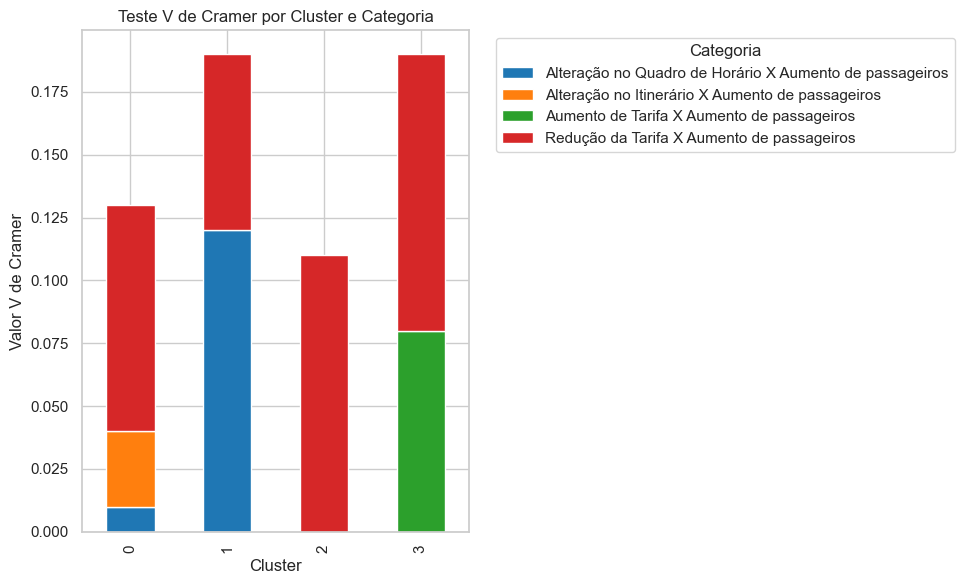

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dados
data = {
    'Cluster': ['0', '1', '2', '3'],
    'Alteração no Quadro de Horário X Aumento de passageiros': [0.01, 0.12, 0.00, 0.00],
    'Alteração no Itinerário X Aumento de passageiros': [0.03, 0.00, 0.00, 0.00],
    'Aumento de Tarifa X Aumento de passageiros': [0.00, 0.00, 0.00, 0.08],
    'Redução da Tarifa X Aumento de passageiros': [0.09, 0.07, 0.11, 0.11]
}

# Criando o DataFrame
df = pd.DataFrame(data)
df.set_index('Cluster', inplace=True)

# Cores
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Criando o gráfico de barras empilhadas
ax = df.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Adicionando título e rótulos
plt.title('Teste V de Cramer por Cluster e Categoria')
plt.xlabel('Cluster')
plt.ylabel('Valor V de Cramer')

# Adicionando a legenda
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


Análise: Associação fraca a moderada entre alterações no Quadro de Horário e redução da tarifa. Não há associação entre o aumento de passageiros e alterações realizadas pela SUMOB ou BHTRANS